# Tarea Examen 1

Nombre: Román Tamez Vidal Tamayo Tamez

### Física Computacional 2025-2

Resuelva los siguientes ejercicios.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import math as m

In [2]:
import matplotlib
# Para el formato de las gráficas
matplotlib.rcParams.update(
    {
        "font.family": "serif",
        "text.usetex": True,
        "pgf.rcfonts": False,
        "axes.unicode_minus": False,
        "font.size": 12,
        "pgf.preamble": "\n".join([ # Aún más formato
        r"\usepackage[utf8]{inputenc}",
        r"\usepackage[T1]{fontenc}",
        ])
    }
)

### Problema 1 
Genere una función que se llame ```mi_plot(x,y,gap=1,label=" ")``` que haga la gráfica de una función no contínua y que no dibuje una línea vertical. Para ello utilice el parámetro ```gap``` para indicar cual sería la mínima discontinuidad que se debe tomar en cuenta para que el graficador no realice la línea vertical. Verifique el funcionamiento de su función con 3 ejemplos.

In [3]:
def mi_plot(x_orig,y_orig,gap=1, label=""):
    '''
    Grafica puntos (x,y) sin modificar los arreglos originales, y evitando distcontinuidades
    entre puntos con diferencias mayores a 'gap'
    '''
    x, y = x_orig.copy(), y_orig.copy()

    for i in range(len(x)-1):
        if abs(y[i] - y[i+1]) > gap:
            y[i] = np.nan
            # print('Discontinuidad en:', x[i])
    
    plt.plot(x,y, label=label)
    # Visualización
    mid = (max(y_orig) + min(y_orig))/2
    plt.ylim((mid - gap*1.1),(mid + gap*1.1))

    plt.legend(), plt.grid(), 
    plt.show()

In [4]:
# Regresa un arreglo f(x) para un arreglo de xs y una función f
def func_array(x_array, f):
    y_array = np.zeros_like(x_array)

    for i in range(len(x_array)):
        y_array[i] = f(x_array[i])
    return y_array

#### Funciones de prueba

In [5]:
# cotangente
x_cot = np.linspace(-2*np.pi, 2*np.pi, 500)
y_cot = np.cos(x_cot)/np.sin(x_cot)

# Onda cuadrada
def onda_cuadrado_par_impar(x):
    # math.floor() regresa la parte entera de un número
    if m.floor(x) % 2 == 1:
        return 0
    else:
        return 1

x_cuadrado = np.linspace(-5,5, 200)
y_cuadrado = func_array(x_cuadrado, onda_cuadrado_par_impar) + 5

# cosecante
x_csc = np.linspace(-2*np.pi, 2*np.pi, 500)
y_csc = 1/np.sin(x_cot)

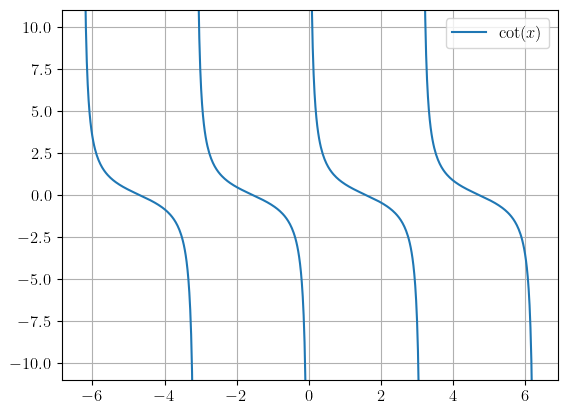

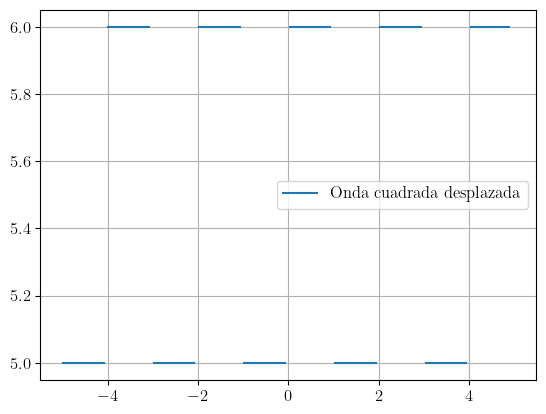

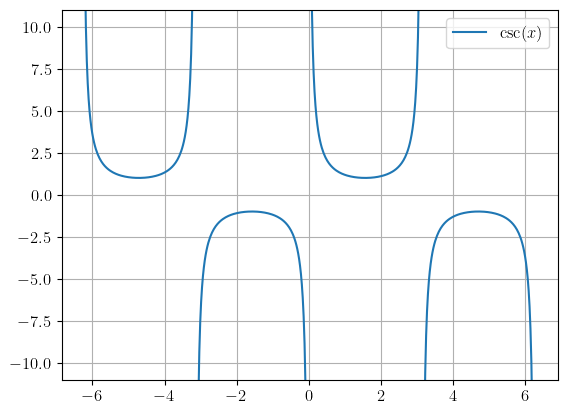

In [6]:
mi_plot(x_cot,y_cot,gap=10,label=r"$\textrm{cot}(x)$")
mi_plot(x_cuadrado,y_cuadrado,gap=0.5,label=r"Onda cuadrada desplazada")
mi_plot(x_csc,y_csc,gap=10,label=r"$\textrm{csc}(x)$")

### Problema 2

Se tiene la siguiente función definida en el intervalo $[0,1]$:
$$
f(x)= \left\{ \begin{matrix}
{\rm Ai}(10x + ai_0 ) \textrm{ si } |x| \leq 1 \\ 
0 \textrm{ si } |x| > 1 \end{matrix} 
\right.
$$
donde $Ai(x)$ es la función de Airy, y $ai_0$ es la raíz de dicha función más cercana al cero. Defina una funcion $g(x)$ como la repetición periódica de dicha función para $x\in \mathbb{R}$. Verifique el resultado haciendo la gráfica de dicha función en el intervalo $[-10,10]$ o cualquier otro intervalo cuyo dominio sea mayor.

#### Raíz de newton

In [7]:
def raiz_newton_n(f , x0 , err = 1e-8 , h=1e-5):
    '''
    Obtiene una raíz de una función 'f' dado un punto inicial 'x0' donde se iniciará
    la búsqueda usando el algoritmo de Newton. 
    '''
    d_raiz = 2*err
    contador = 0 

    while abs(f(x0)) >= err or d_raiz >= err:
        x_old = x0
        # ----- Algoritmo de Newton -----
        fp = (f(x0+h)-f(x0-h))/(2*h) # Derivada simétrica en f(x0)
        x0 = x0 - f(x0)/fp
        # -------------------------------
        d_raiz = abs(x0 - x_old)
        contador += 1
        print('Paso:',contador, '\t Valor:',x0, '\t Diff:' ,d_raiz )
    return x0

In [8]:
def func_airy(x):
    return sp.special.airy(x)[0]

In [9]:
ai0 = raiz_newton_n(func_airy, -1.5)

Paso: 1 	 Valor: -3.001539932136938 	 Diff: 1.501539932136938
Paso: 2 	 Valor: -1.789077039263832 	 Diff: 1.212462892873106
Paso: 3 	 Valor: -2.477176419234488 	 Diff: 0.6880993799706561
Paso: 4 	 Valor: -2.335875613320548 	 Diff: 0.14130080591394023
Paso: 5 	 Valor: -2.3381074191174465 	 Diff: 0.002231805796898634
Paso: 6 	 Valor: -2.338107410459767 	 Diff: 8.657679462231727e-09


In [10]:
def func_mi_airy(x):
    if abs(x) <= 1: 
        return sp.special.airy(10*x + ai0)[0]
    else:
        return 0
    
def func_g(x):
    # Se mapea x al intervalo [-1,1]
    x_periodica = (x + 1) % 2 - 1    
    return func_mi_airy(x_periodica)

#### Graficas

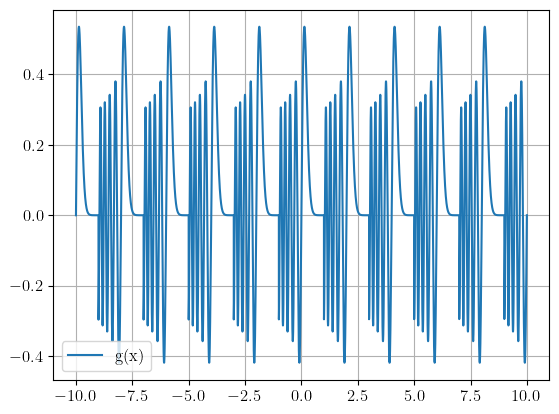

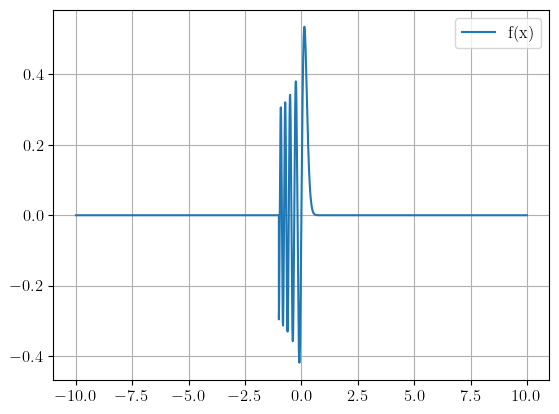

In [11]:
x_airy = np.linspace(-10, 10, int(20/0.001)) # Me parece una h muy pequeña
f_airy =func_array(x_airy, func_mi_airy)
g_airy = func_array(x_airy, func_g)

plt.plot(x_airy,g_airy, label=r"g(x)")
plt.legend(), plt.grid()
plt.show()

plt.plot(x_airy,f_airy, label=r"f(x)")
plt.legend(), plt.grid()
plt.show()

### Problema 3

Dibuje la primera y segunda derivada de la función $g(x)$ del problema anterior en el intervalo $x \in [-10,10]$. 

#### Derivada simétrica con error en $h^3$
$$
 f'_i \approx \frac{f_{i+1}-f_{i-1}}{ 2 h}
$$

Derivadas asimétricas

$$
 f'_{0} \approx \frac{-3 f_{0} + 4 f_{1} - f_{2}}{2h} \,,\quad f'_{N}\approx \frac{3 f_{N} - 4 f_{N-1} + f_{N-2}}{2h}
$$

In [12]:
def derivada_h2(f, x):
    h_2, df = x[2] - x[0], np.zeros_like(f)
    for i in range(1,len(x)-1):
        df[i] = f[i+1] - f[i-1]

    # Puntos inicial y final
    df[0] = -f[2] + 4*f[1] - 3*f[0]
    df[-1] = f[-3] - 4*f[-2] + 3*f[-1]
    return df / h_2

#### Segunda derivada simétrica con error en $h^3$
$$
 f''_i \approx \frac{f_{i+1}- 2f_{i} + f_{i-1}}{h^2}
$$

Derivadas asimétricas
$$
 f''_{0} \approx \frac{2 f_{0} -5  f_{1} + 4 f_{2} - f_{3}}{h^2} \,,\quad f''_{N}\approx \frac{2 f_{N} -5  f_{N-1} + 4 f_{N-2} - f_{N-3}}{h^2}
$$

In [13]:
def segunda_derivada_h2(f, x):
    hh, ddf = (x[1] - x[0])**2, np.zeros_like(f)
    for i in range(1,len(x)-1):
        ddf[i] = f[i+1] - 2*f[i] + f[i-1]

    # Puntos inicial y final
    ddf[0] = 2*f[0] - 5*f[1] + 4*f[2] - f[3]
    ddf[-1] = 2*f[-1] - 5*f[-2] + 4*f[-3] - f[-4]
    return ddf / hh

#### Graficas

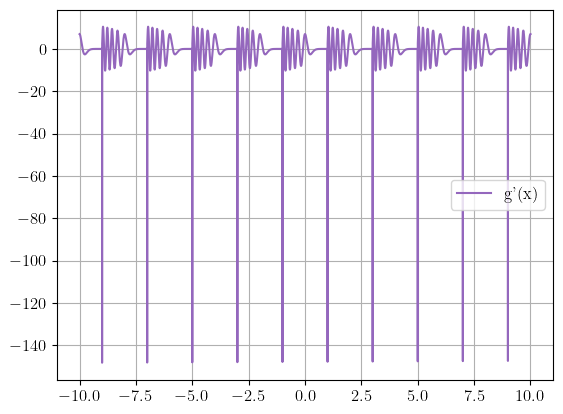

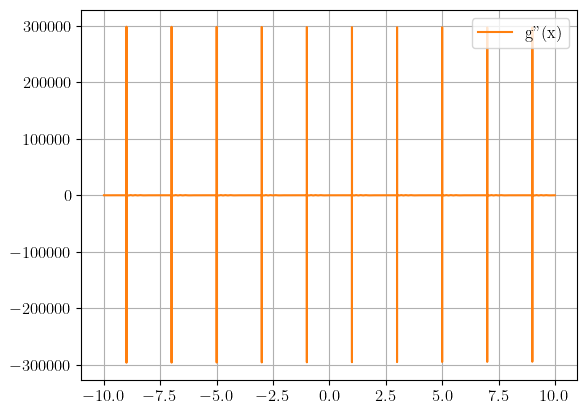

In [14]:
dy_airy = derivada_h2(g_airy, x_airy)
ddy_airy = segunda_derivada_h2(g_airy, x_airy)

plt.plot(x_airy,dy_airy, label=r"g'(x)", color='tab:purple')
plt.legend(), plt.grid()
plt.show()

plt.plot(x_airy,ddy_airy, label=r"g''(x)", color='tab:orange')
plt.legend(), plt.grid()
plt.show()


### Problema 4

El objetivo del siguiente problema es obtener la curva de convergencia de las integrales que se piden en los incisos de este problema. Para ello inicie con una partición del segmento indicado en las integrales y vea el resultado de la integral, este primer segmento estará subdividido en 3 pedazos en el caso de ```Simp_3_8``` o en 4 en el caso de ```Boole```. Posteriormente divida cada sub-segmento en 2 y obtenga el resultado de la integral. Repita este procedimiento de dividir cada sub-segmento en 2 hasta obtener una precisión de $10^{-4}$, es decir, que el resultado de la integral no cambie en al menos 4 cifras. Realice en cada caso una gráfica del resultado de la integral contra el número de particiones en cada caso.
    1. $\int _0 ^1 \frac{dx}{1+x^2} = \frac{\pi}{4}$
    2. $\int _0 ^3 \frac{dx}{1+x^3}$
    3. $\int _0 ^{0.4} \sin (x^2)dx$
    4. $\int _2 ^4 \frac{dx}{\ln (x)}$
    5. $\int _0 ^1 x e^{-x} dx$
    
Las expresiones de las integrales que se mencionan en el párrafo anterior son:
- Función ```Simp_3_8```: $\int ^{x_3} _{x_0} f(x)dx = \frac{3h}{8}(f_0 + 3f_1 + 3f_2 + f_3)$
- Función ```Boole``` : $\int ^{x_4} _{x_0} f(x)dx = \frac{2h}{45}(7f_0 + 32f_1 + 12f_2 + 32f_3 + 7f_4)$

#### Integrales

In [15]:
def integral_simp_3_8(f, x):
    '''
    Regresa la integral de Simpson de la función
    Los intervalos de 'f' y 'x' deben ser un múltiplo de 3
    '''
    int_f, h = 0, abs(x[0] - x[1])
    N = len(f)-1 #  Número de intervalos de integración [x_i, x_i+3h]

    if N % 3 != 0 or len(f) != len(x):
        raise Exception("Perdón. Ingresa una 'f' apropiada.") 

    for i in range(0,N,3):
        int_f += 3*f[i] + 9*f[i+1] + 9*f[i+2] + 3*f[i+3]
    int_f = int_f*h/8.0
        
    return int_f

In [16]:
def integral_boole(f, x):
    '''
    Regresa la integral de boole de la función
    Los intervalos de 'f' y 'x' deben ser un múltiplo de 4
    '''
    int_f, h2 = 0, abs(x[0] - x[2])
    N = len(f)-1 #  Número de intervalos de integración [x_i, x_i+4h]

    if N % 4 != 0 or len(f) != len(x):
        raise Exception("Perdón. Ingresa una 'f' apropiada.") 

    for i in range(0,N,4):
        int_f += 7*f[i] + 32*f[i+1] + 12*f[i+2] + 32*f[i+3] + 7*f[i+4]
    int_f = int_f*h2/45.0
        
    return int_f

#### Convergencia

In [17]:
def checar_cifras_o_diff(a,b,n=4):
    '''
    Checa si dos números coinciden en las primeras n cifras o
    si su diferencia es menor a 1e-n
    '''
    diff = abs(a-b)
    return (diff/(a+1e-20) <= 10**(-n) or diff <= 10**(-n))

In [18]:
def linspace_intervalos(x_min, x_max, n_intervalos):
    # Regresa una partición de [x_min, x_max] en 'n_intervalos'
    return np.linspace(x_min, x_max, n_intervalos + 1)

In [19]:
def convergencia(f, x_min, x_max, func_integral, num_fis, comp_func=checar_cifras_o_diff):
    '''
    Obtiene la integral de 'f' en el intervalo (x_min,x_max) utilizando una función
    de integración 'func_integral' que toma 'num_fis' puntos para calcular la integral.

    Esto se realiza hasta que la nueva aproximación y la anterior cumplan con una comparación
    dada por 'comp_func'    
    '''
    lspace = lambda n: linspace_intervalos(x_min,x_max,n)
    h_inter = num_fis - 1   # Número intervalos que se integran por paso en 'func_integral'
    ints, num_particiones = [], [h_inter]

    # Primera aproximación de la integral
    x_array = lspace(h_inter)
    f_array = func_array(x_array, f)
    ints.append(func_integral(f_array, x_array))

    contador = 1
    while True:
        particiones = h_inter*(contador+1)
        x_array = lspace(particiones)
        f_array = func_array(x_array, f)

        ints.append(func_integral(f_array, x_array))
        num_particiones.append(particiones)
        
        if comp_func(ints[contador],ints[contador-1]):
            # print('Se ha llegado a la convergerncia deseada', ints[contador])
            return num_particiones, ints
        
        if contador * h_inter > 100_000:
            print('La integral tarda mucho en converger')
            return num_particiones, ints
        
        # print('Paso:',contador + 1, '\t Valor:',ints[contador], '\t Diff:' ,abs(ints[contador] - ints[contador-1]), '\t hs:', particiones)
        contador += 1


#### Funciones

In [20]:
def func_1(x):
    return 1/(1+x**2)
def func_2(x):
    return 1/(1+x**3)
def func_3(x):
    return np.sin(x**2)
def func_4(x):
    return 1/np.log(x)
def func_5(x):
    return x* np.e**(-x)

funcs_prob_4 = [
    [func_1, 0, 1], 
    [func_2, 0, 3], 
    [func_3, 0, 0.4], 
    [func_4, 2, 4], 
    [func_5,0,1]
    ]

#### Gráficas de convergencia de la integral de Simpson

In [21]:
def graficar_convergencia(funcs, integral, num_fis ,integral_name='Integral'):
    '''
    Hace las gŕaficas de convergencia
    '''
    for i in range(len(funcs)):
        num_particiones, ints = convergencia(funcs[i][0], funcs[i][1], funcs[i][2], integral, num_fis, checar_cifras_o_diff)
        print('Número de particiones:',num_particiones[-1], '\t\t Integral aproximada:',ints[-1])

        plt.title(integral_name + ' de la función ' + str(i+1) + r' vs \# particiones')
        plt.plot(num_particiones[-1],ints[-1], 'x',label=str(ints[-1]), color='orange')
        plt.plot(num_particiones,ints, '.')
        plt.legend()
        plt.show()

Número de particiones: 9 		 Integral aproximada: 0.7853980773222382


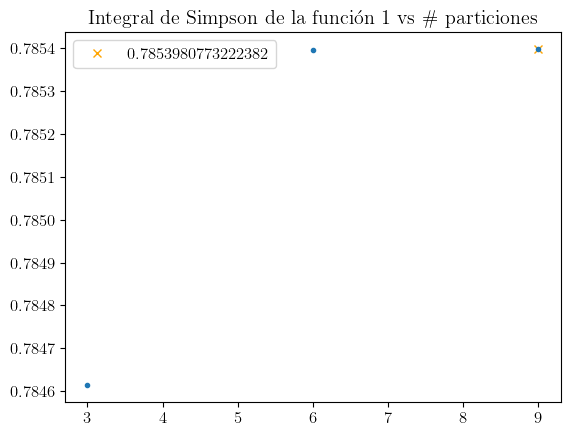

Número de particiones: 18 		 Integral aproximada: 1.1544965550127817


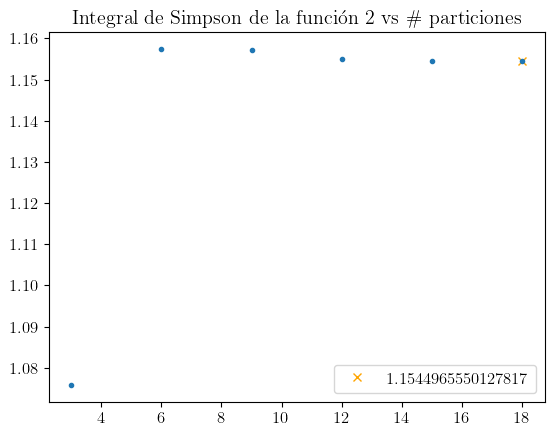

Número de particiones: 6 		 Integral aproximada: 0.021294053895258912


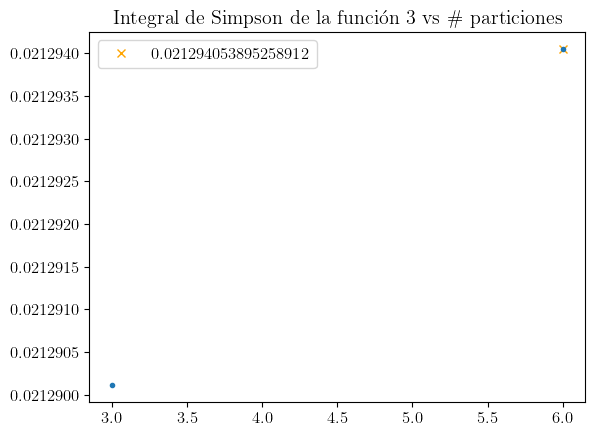

Número de particiones: 12 		 Integral aproximada: 1.9224724580593413


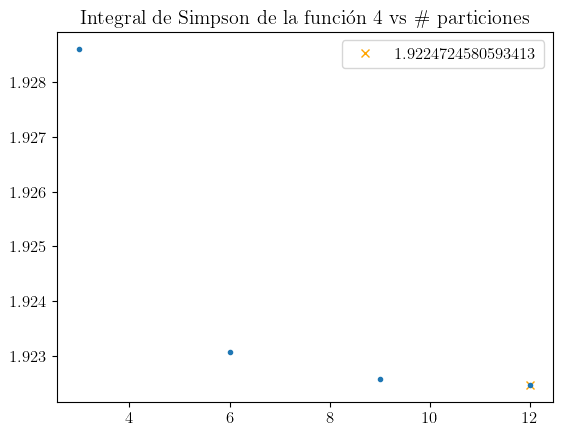

Número de particiones: 9 		 Integral aproximada: 0.26423682351605865


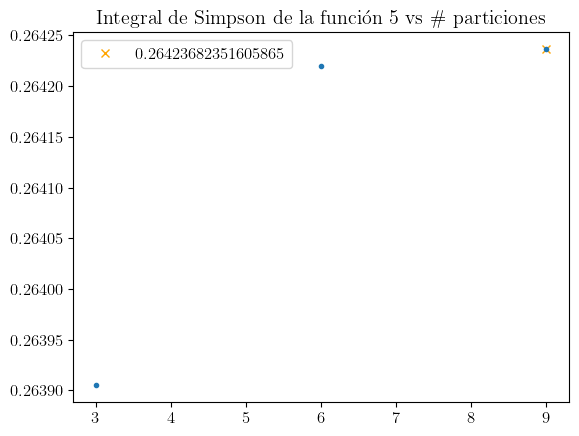

In [22]:
graficar_convergencia(funcs_prob_4, integral_simp_3_8, 4, 'Integral de Simpson')


#### Gráficas de convergencia de la integral de Boole

Número de particiones: 12 		 Integral aproximada: 0.7853981743991673


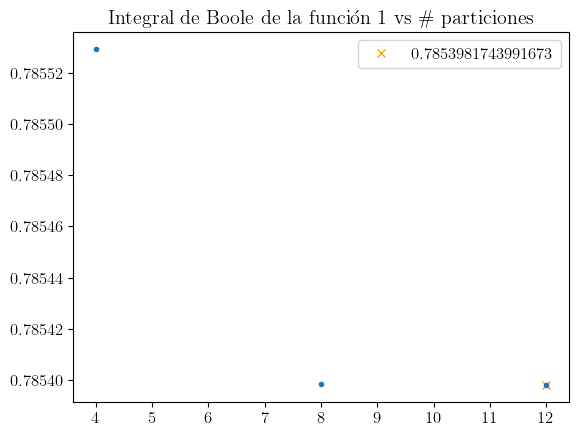

Número de particiones: 20 		 Integral aproximada: 1.1544490996069914


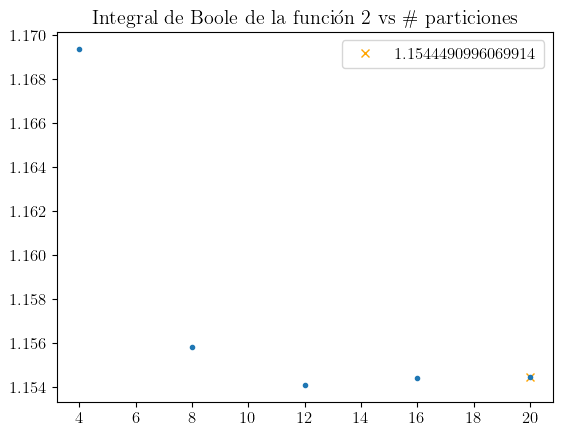

Número de particiones: 8 		 Integral aproximada: 0.021294354054721153


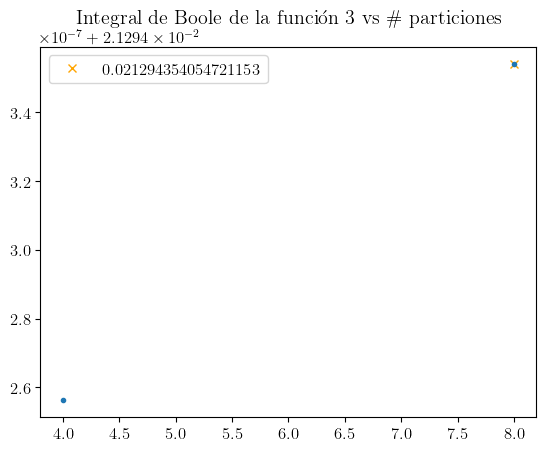

Número de particiones: 12 		 Integral aproximada: 1.922424821018899


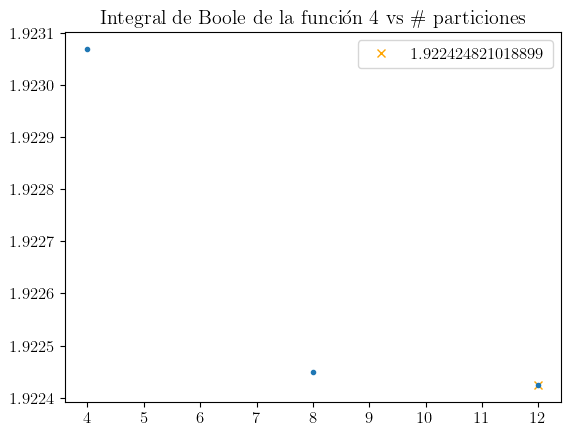

Número de particiones: 8 		 Integral aproximada: 0.2642410894848887


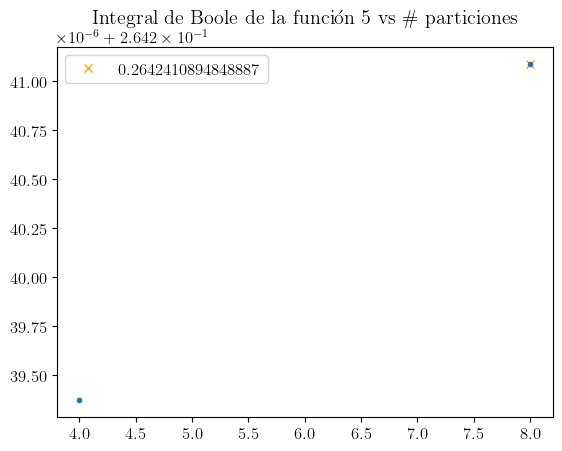

In [23]:
graficar_convergencia(funcs_prob_4, integral_boole, 5,'Integral de Boole')
